In [1]:
import pandas as pd

In [5]:
dados = pd.read_csv('Dados/aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [7]:
dados['Valor'].mean()

4985.730140445705

In [9]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]


In [10]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,NaN
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22571,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
22572,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
22574,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


In [12]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro

In [15]:
for bairro, dados in grupo_bairro:
    print('{} -> {}'.format(bairro, dados.Valor.mean()) ) # calcula média de cada bairro

Barra da Tijuca -> 7073.721754654425
Botafogo -> 8690.962879640045
Copacabana -> 4137.4135556361
Flamengo -> 4148.489626556016
Ipanema -> 9375.905
Leblon -> 8757.75411119812
Tijuca -> 2042.1940700808625


In [16]:
grupo_bairro.Valor.mean()

Bairro
Barra da Tijuca    7073.721755
Botafogo           8690.962880
Copacabana         4137.413556
Flamengo           4148.489627
Ipanema            9375.905000
Leblon             8757.754111
Tijuca             2042.194070
Name: Valor, dtype: float64

In [19]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7073.72,3626.94
Botafogo,8690.96,999.19
Copacabana,4137.41,1153.37
Flamengo,4148.49,1105.25
Ipanema,9375.91,2249.54
Leblon,8757.75,2110.54
Tijuca,2042.19,726.21


## Estatística Descritiva

In [20]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3921.0,7073.72,11804.46,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,889.0,8690.96,150826.94,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2759.0,4137.41,3596.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


In [23]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,100.0,600000.0,27736063.0
Botafogo,700.0,4500000.0,7726266.0
Copacabana,100.0,35000.0,11415124.0
Flamengo,800.0,35000.0,2999358.0
Ipanema,1200.0,90000.0,16876629.0
Leblon,100.0,100000.0,11183652.0
Tijuca,750.0,45000.0,2272962.0


In [26]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


# https://matplotlib.org/

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'média do aluguel por bairro')

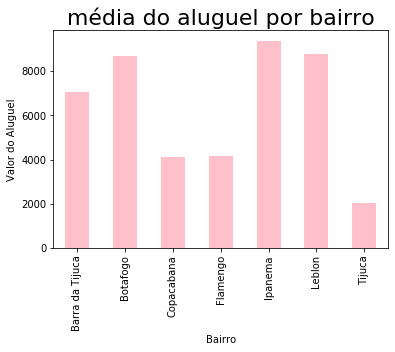

In [40]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'pink')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('média do aluguel por bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor máximo')

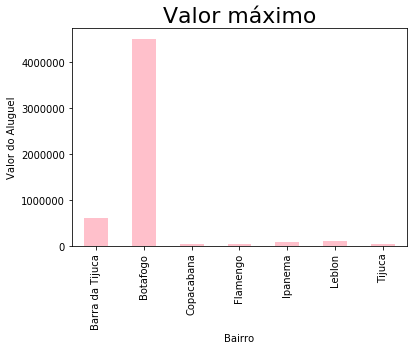

In [41]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'pink')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor máximo', {'fontsize':22})